# Midterm
Presented by Zoe Shen, Jesse Price, Andy Fan, and Nathan Smith

When our team first looked through our data results, giving data on athlete earnings over the last 30 years up to 2020 with different characteristics, we started to identify many trends. Due to the nature the data giving rich information about the countries, the total earnings, the industries (individual sports), and so forth, we started to see a series of unique trends diverging in different directions. We saw in some cases how celebrity status could have inflated salaries, how national diversity had becoming more prevalent, how certain sports were becoming more popular, how growth in earnings has changed, and other developments. This all led us to a question that we continued to ask ourselves throughout this process: 
<br><b>How has the sports landscape changed as represented by its high-tier cash flow?</b><br>
However, this question lead to more questions as each of the categories (columns) can tell unique stories. With that in mind, our team decided that the best way to approach this was to break this data down by category. Therefore, we decided to break this into the following categories: 

1. Earnings Over Time
2. Industry and Player Specific Relations
3. Nationality: Diversification of Nations and Nationality Density
4. Individual Sport Developments


With these questions we could better segment the data we were looking through and individually come up with hypotheses that were tested. 
<br> Below you will find each of these categories mapped out individually. Each contains unique <u>hypothesis</u> that with the use of python code, we analyzed to the best of our ability. In each section, we break down about what these insights have shown us and at the end, a brief overview of his this relates to our original hypothesis. 
<br>Enjoy.

### Graph Tuning
Below this you will find a data tuning system all segments used to refine the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import statsmodels.formula.api as smf

In [3]:
df=pd.read_csv('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')
df = df.rename(columns={'earnings ($ million)': 'earnings'})
df = df.rename(columns=lambda x: x.replace(' ', '_'))

df.loc[df['Sport'].str.contains('auto racing', case=False), 'Sport'] = 'NASCAR'
df.loc[df['Sport'].str.contains('f1', case=False), 'Sport'] = 'f1'

df.Sport=df.Sport.str.lower().replace('nba','basketball')

df.loc[df['Name']=='Deion Sanders','Sport'] = 'baseball'

df.columns = df.columns.str.lower()

df.head()

,s.no,name,nationality,current_rank,previous_year_rank,sport,year,earnings
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,nascar,1990,10.0
4,5,Alain Prost,France,5,NaN,nascar,1990,9.0


# 1.Earnings Over Time

In [4]:
# Section: Earning over time


### hypothesis (1) Test the average earning of top 10 ranked players increases over time

In [5]:
#creating a dataframe on average earnings
avg_earnings_by_year = df.groupby("year")["earnings"].mean()
df_avg_earnings = pd.DataFrame(avg_earnings_by_year).reset_index()
df_avg_earnings = df_avg_earnings.rename(columns={'earnings': 'avg_earnings'})
df_avg_earnings.head()

,year,avg_earnings
0,1990,12.80
1,1991,18.35
2,1992,15.87
3,1993,17.83
4,1994,14.89


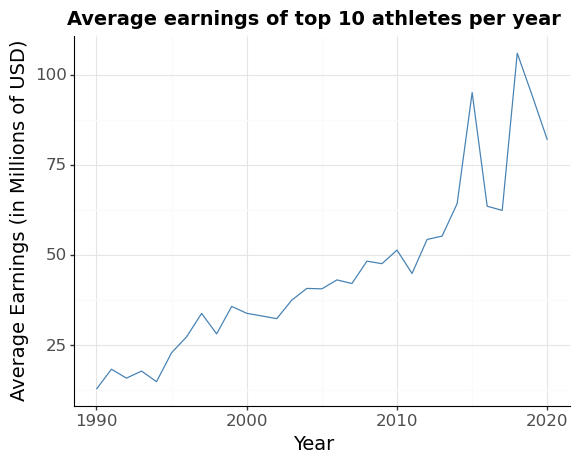

<ggplot: (137204301008)>

In [6]:
#plotting a line graph to see the general trend of average earning over time
(ggplot(df_avg_earnings, aes(x='year', y='avg_earnings'))
 + geom_line(color='steelblue')
 + labs(title='Average earnings of top 10 athletes per year', x='Year', y='Average Earnings (in Millions of USD)')
 + theme_bw()
 + theme(plot_title=element_text(weight='bold', size=14),
         axis_text=element_text(size=12),
         axis_title=element_text(size=14),
         panel_border=element_blank(),
         axis_line=element_line(size=.8)))

In [7]:
reg1_avg = smf.ols('avg_earnings~year',df_avg_earnings).fit() 
reg1_avg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           avg_earnings   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     145.4
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           1.33e-12
Time:                        16:32:07   Log-Likelihood:                -110.47
No. Observations:                  30   AIC:                             224.9
Df Residuals:                      28   BIC:                             227.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4802.6131    402.125    -11.943      0.000   -5626.329   -3978.898
year           2.4179      0.201     12.057      0.000       2.007       2.829
==============================================================================
Omnibus:                       14.925   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.813
Skew:                           1.420   Prob(JB):                     0.000368
Kurtosis:                       5.140   Cond. No.                     4.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# Regression analysis:
# The coefficient for the year variable is 2.4179, indicating that for each one-year increase in the year, 
# the average earnings of the top 10 ranked athlete increase by an average of $2.4179 million, holding all other variables constant.

# R-squared is a measure of how closely the data in a regression line fit the data in the sample
# In this case, 83.8% of the dependent variable (earnings) is explained by the independent variable (year)

# p-value < 0.05, suggesting a significant relationship.
# This means that there is a positive relationship between year and average earnings of top 10 athletes, 
# indicating that the earning of highest-paid top 10 athletes tends to increase as time goes on
# Thus, we should not reject the first hypothesis

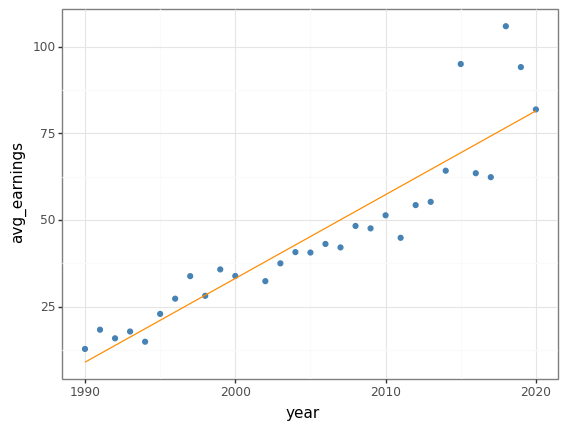

<ggplot: (137204405191)>

In [9]:
# We can explore the relationship on a scatterplot with the regression line
df_avg_earnings['reg1_pred_avg_earning']=reg1_avg.predict() 

(ggplot(df_avg_earnings, aes(x='year', y='avg_earnings'))+
geom_point(color='steelblue')+
geom_line(aes(x='year', y='reg1_pred_avg_earning'), color='darkorange')+ theme_bw()
)

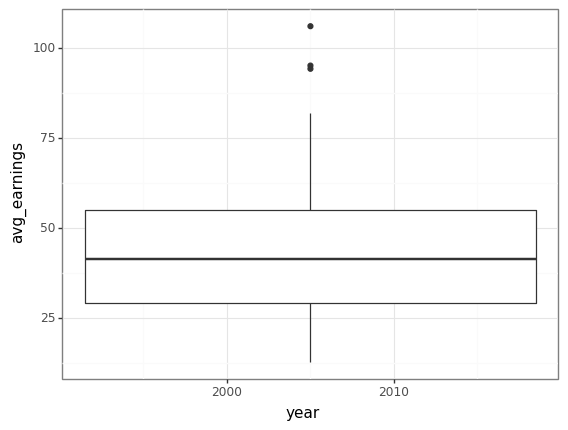

<ggplot: (137204407522)>

In [10]:
# We can identify 3 outliers from the box plot below
(ggplot(df_avg_earnings, aes(x='year', y='avg_earnings')) +
        geom_boxplot()+theme_bw()
)

In [11]:
#identifying the three outliers
df_avg_earnings.sort_values(by='avg_earnings', inplace=True, ascending=False)
print(df_avg_earnings.iloc[0])
print(df_avg_earnings.iloc[1])
print(df_avg_earnings.iloc[2])

year                     2018.000000
avg_earnings              105.940000
reg1_pred_avg_earning      76.670187
Name: 27, dtype: float64
year                     2015.000000
avg_earnings               95.030000
reg1_pred_avg_earning      69.416545
Name: 24, dtype: float64
year                     2019.000000
avg_earnings               94.140000
reg1_pred_avg_earning      79.088067
Name: 28, dtype: float64


### hypothesis (2) Test the earning of highest-paid athletes increases as time goes on

In [12]:
# Creating a dataframe with athletes only ranked top 1
df_no1 = df[(df.current_rank == 1)]
df_no1.head()

,s.no,name,nationality,current_rank,previous_year_rank,sport,year,earnings
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
10,11,Evander Holyfield,USA,1,8,boxing,1991,60.5
20,21,Michael Jordan,USA,1,3,basketball,1992,35.9
30,31,Michael Jordan,USA,1,1,basketball,1993,36.0
40,41,Michael Jordan,USA,1,1,basketball,1994,30.0


In [13]:
df_no1.describe()

,s.no,current_rank,year,earnings
count,30.00000,30.0,30.000000,30.000000
mean,146.60000,1.0,2005.133333,91.396667
std,88.45751,0.0,9.216677,60.464293
min,1.00000,1.0,1990.000000,28.600000
25%,73.50000,1.0,1997.250000,62.625000
50%,147.00000,1.0,2005.500000,79.300000
75%,219.50000,1.0,2012.750000,103.750000
max,292.00000,1.0,2020.000000,300.000000


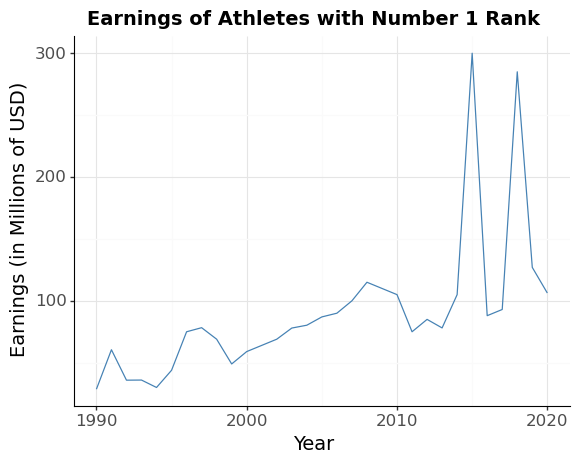

<ggplot: (137205015158)>

In [14]:
# Creating a line graph to see the general trend
(ggplot(df_no1, aes(x='year', y='earnings'))
 + geom_line(color='steelblue')
 + labs(title='Earnings of Athletes with Number 1 Rank', x='Year', y='Earnings (in Millions of USD)')
 + theme_bw()
 + theme(plot_title=element_text(weight='bold', size=14),
         axis_text=element_text(size=12),
         axis_title=element_text(size=14),
         panel_border=element_blank(),
         axis_line=element_line(size=.8)))

In [15]:
# From the line graph above, we can see a general increasing trend with some outliers
# We can perform a regressional analysis on earnings in years
reg2_top1earnings = smf.ols('earnings~year',df_no1).fit() 
reg2_top1earnings.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               earnings   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     18.84
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           0.000167
Time:                        16:32:08   Log-Likelihood:                -157.40
No. Observations:                  30   AIC:                             318.8
Df Residuals:                      28   BIC:                             321.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8251.8236   1921.946     -4.293      0.000   -1.22e+04   -4314.896
year           4.1609      0.959      4.341      0.000       2.198       6.124
==============================================================================
Omnibus:                       32.185   Durbin-Watson:                   2.381
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.620
Skew:                           2.377   Prob(JB):                     1.70e-16
Kurtosis:                       8.958   Cond. No.                     4.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# Regression analysis:
# The coefficient for the year variable is 4.1609, indicating that for each one-year increase in the year, 
# the earnings of the top-ranked athlete increase by an average of $4.16 million, holding all other variables constant.

# R-squared is a measure of how closely the data in a regression line fit the data in the sample
# In this case, 40.2% of the dependent variable (earnings) is explained by the independent variable (year)
# the adjusted R-squared value of 0.381 suggests that there may be other factors affecting the variation in earnings beyond just the year variable.

# p-value < 0.05, suggesting a significant relationship.
# This means that there is a positive relationship between year and earnings, 
# indicating that the earning of highest-paid athletes tends to increase as time goes on
# Thus, we should not reject the second hypothesis

C:\Users\jesse\AppData\Local\Temp\ipykernel_24652\3277967541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


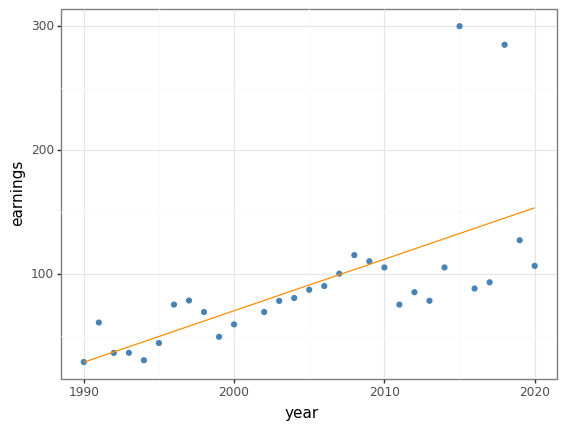

<ggplot: (137205356075)>

In [17]:
# We can then apply the regression on predicted earning in a line on scatterplot
df_no1['reg2_pred_earning']=reg2_top1earnings.predict() 

(ggplot(df_no1, aes(x='year', y='earnings'))+
geom_point(color='steelblue')+
geom_line(aes(x='year', y='reg2_pred_earning'), color='darkorange')+ theme_bw()
)

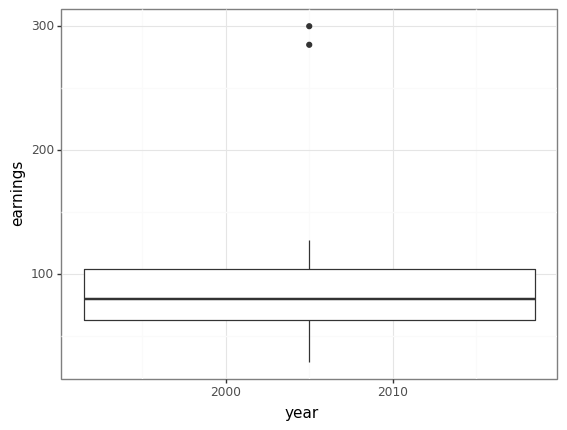

<ggplot: (137205012589)>

In [18]:
# The majority of the earning data fit well with the line
# except for two outliers that we can identify from the box plot below
# Although we have less outliers than the first regression,
# the two are further from the rest of the data points
(ggplot(df_no1, aes(x='year', y='earnings')) +
        geom_boxplot()+theme_bw()
)

In [19]:
#identifying the two outliers
df_no1.sort_values(by='earnings', inplace=True, ascending=False)
print(df_no1.iloc[0])
print(df_no1.iloc[1])

s.no                               242
name                  Floyd Mayweather
nationality                        USA
current_rank                         1
previous_year_rank                   1
sport                           boxing
year                              2015
earnings                         300.0
reg2_pred_earning            132.45118
Name: 241, dtype: object
s.no                               272
name                  Floyd Mayweather
nationality                        USA
current_rank                         1
previous_year_rank                >100
sport                           boxing
year                              2018
earnings                         285.0
reg2_pred_earning           144.933971
Name: 271, dtype: object


C:\Users\jesse\AppData\Local\Temp\ipykernel_24652\2306220266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
# Comparing to the first regression/hypothesis:
# The coefficient on year is higher in the second regression than in the first,
# suggesting the average earnings of top 10 players increase less than the top-1 ranked player over time.

# The R-squared is significantly higher in the first hypothesis,
# indicating a stronger positive correlation between year and average earnings.

In [21]:
# After we verified the increasing trend of earnings over time
# The third hypothesis is to test the growth rate of top 1 ranked players' earnings increases over time
# continuously using df_no1 over time

### Hypothesis (3) Test the growth rate of the top 1 ranked earnings increase over time

In [23]:
df_no1['ln_earnings'] = np.log(df_no1['earnings'])
df_no1.head()

/var/folders/3h/kq2037cj49l2x34nyyjnxv1h0000gn/T/ipykernel_3618/3584939266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,s.no,name,nationality,current_rank,previous_year_rank,sport,year,earnings,reg2_pred_earning,ln_earnings
241,242,Floyd Mayweather,USA,1,1,boxing,2015,300.0,132.451180,5.703782
271,272,Floyd Mayweather,USA,1,>100,boxing,2018,285.0,144.933971,5.652489
281,282,Lionel Messi,Argentina,1,2,soccer,2019,127.0,149.094901,4.844187
171,172,Tiger Woods,USA,1,1,golf,2008,115.0,103.324667,4.744932
181,182,Tiger Woods,USA,1,1,golf,2009,110.0,107.485598,4.700480


In [24]:
reg3_lnearnings = smf.ols('ln_earnings ~ year', data=df_no1).fit()
reg3_lnearnings.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ln_earnings   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     46.81
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           1.96e-07
Time:                        23:22:16   Log-Likelihood:                -8.4789
No. Observations:                  30   AIC:                             20.96
Df Residuals:                      28   BIC:                             23.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -87.4778     13.423     -6.517      0.000    -114.974     -59.981
year           0.0458      0.007      6.842      0.000       0.032       0.060
==============================================================================
Omnibus:                        4.794   Durbin-Watson:                   1.462
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                3.441
Skew:                           0.809   Prob(JB):                        0.179
Kurtosis:                       3.365   Cond. No.                     4.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# Regression analysis
# The coefficient for the year variable is 0.0458, indicating that for each one-year increase in the year, 
# the growth rate of earning of the top-ranked athlete increase by an average of $0.0458 million, holding all other variables constant.

# R-squared is a measure of how closely the data in a regression line fit the data in the sample
# In this case, 62.6% of the dependent variable (earnings) is explained by the independent variable (year)

# p-value < 0.05, suggesting a significant relationship.
# This indicates that there is strong evidence that year has a positive effect on ln_earnings.
# Thus, we should not reject this hypothesis

/var/folders/3h/kq2037cj49l2x34nyyjnxv1h0000gn/T/ipykernel_3618/1875572439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


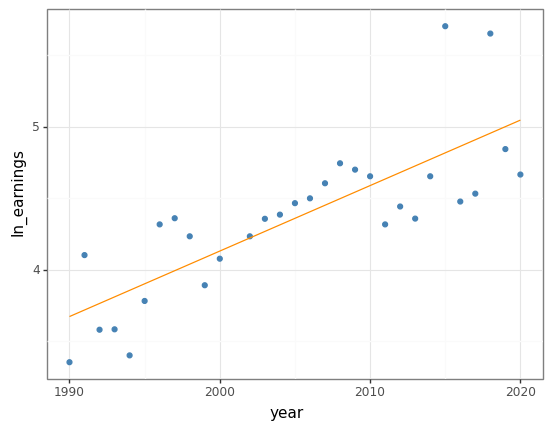

<ggplot: (8776615222908)>

In [26]:
# We can then apply the regression on predicted ln_earning in a line on scatterplot
df_no1['reg3_pred_lnearning']=reg3_lnearnings.predict() 

(ggplot(df_no1, aes(x='year', y='ln_earnings'))+
geom_point(color='steelblue')+
geom_line(aes(x='year', y='reg3_pred_lnearning'), color='darkorange')+ theme_bw()
)

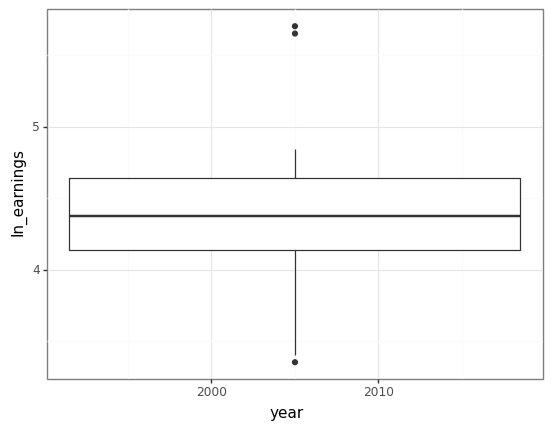

<ggplot: (8776555957312)>

In [27]:
# The majority of the earning data fit well with the line
# We can use the box plot below to check if there is any outliers
(ggplot(df_no1, aes(x='year', y='ln_earnings')) +
        geom_boxplot()+theme_bw()
)

In [28]:
# We can see that there are three outliers.
# We can identify them by sorting the dataset both ascending and descending
df_no1.sort_values(by='ln_earnings', inplace=True, ascending=False)
print(df_no1.iloc[0])
print(df_no1.iloc[1])

df_no1.sort_values(by='ln_earnings', inplace=True, ascending=True)
print(df_no1.iloc[0])

s.no                                242
name                   Floyd Mayweather
nationality                         USA
current_rank                          1
previous_year_rank                    1
sport                            boxing
year                               2015
earnings                          300.0
reg2_pred_earning             132.45118
ln_earnings                    5.703782
reg3_pred_lnearning            4.817953
Name: 241, dtype: object
s.no                                272
name                   Floyd Mayweather
nationality                         USA
current_rank                          1
previous_year_rank                 >100
sport                            boxing
year                               2018
earnings                          285.0
reg2_pred_earning            144.933971
ln_earnings                    5.652489
reg3_pred_lnearning            4.955366
Name: 271, dtype: object
s.no                            1
name                   Mike Tyson
na

/var/folders/3h/kq2037cj49l2x34nyyjnxv1h0000gn/T/ipykernel_3618/2206313326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/3h/kq2037cj49l2x34nyyjnxv1h0000gn/T/ipykernel_3618/2206313326.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [29]:
# Overall, for the section on earnings over time, the three regressions tested are all valid
# All models show an increase of earnings in relation to time. 
# Although we need to consider other variables as well, as suggested in the R^2 of especially the second regression,
# time is definitely an important variable when considering the overall trend of earning

# 2.Industry and Player specific relations

In [6]:
df.sport.unique()

array(['boxing', 'nascar', 'golf', 'basketball', 'tennis', 'nfl',
       'baseball', 'ice hockey', 'american football / baseball', 'f1',
       'hockey', 'american football', 'soccer', 'cycling',
       'motorcycle gp', 'mma'], dtype=object)

### Hypothesis (1) which industries have higher earnings, and is it significant

In [18]:
df['sport'].unique()

array(['boxing', 'nascar', 'golf', 'basketball', 'tennis', 'nfl',
       'baseball', 'ice hockey', 'f1', 'hockey', 'american football',
       'soccer', 'cycling', 'motorcycle gp', 'mma'], dtype=object)

In [20]:
df['log_earnings'] = np.log(df['earnings'])

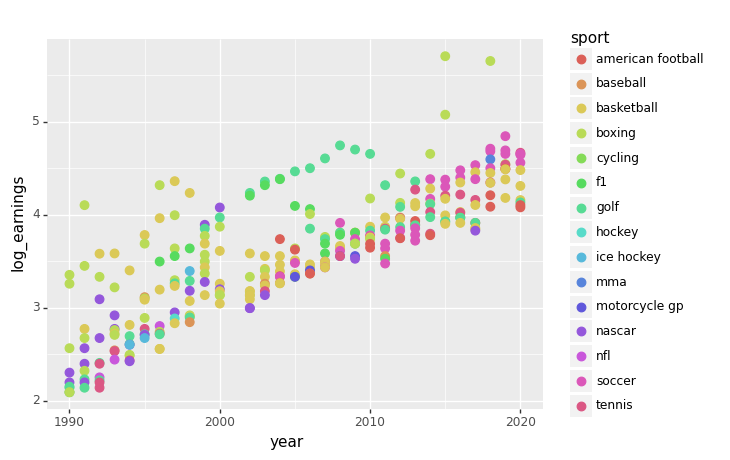

<ggplot: (137735567062)>

In [25]:
(ggplot(df, aes(x='year', y='log_earnings', color = 'sport')) + 
geom_point(size = 3)
)   

#### At a glance, we see that among the different sports: Golf, Boxing, and Basketball all seem to have periods of many high earners compared to the rest of the industry. NFL also has many high earners in the years 2014 and onwards. 

(A regression test will follow)

In [30]:
reg_inc_sport = smf.ols('earnings ~ sport',df).fit()
#a basic linear regression, where each industry is a dummy variable. "amaerican football" is the base-group. 

In [33]:
reg_inc_sport.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               earnings   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     3.165
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           0.000122
Time:                        15:52:45   Log-Likelihood:                -1462.1
No. Observations:                 301   AIC:                             2954.
Df Residuals:                     286   BIC:                             3010.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 53.0118      7.749      6.841      0.000      37.759      68.264
sport[T.baseball]        -28.9261     14.348     -2.016      0.045     -57.168      -0.684
sport[T.basketball]      -11.1423      8.514     -1.309      0.192     -27.901       5.617
sport[T.boxing]           -3.0379      9.069     -0.335      0.738     -20.887      14.812
sport[T.cycling]         -25.0118     32.876     -0.761      0.447     -89.722      39.698
sport[T.f1]               -3.3964     11.772     -0.289      0.773     -26.566      19.774
sport[T.golf]             -4.4549      9.124     -0.488      0.626     -22.414      13.504
sport[T.hockey]          -35.1118     32.876     -1.068      0.286     -99.822      29.598
sport[T.ice hockey]      -33.7451     20.008     -1.687      0.093     -73.126       5.636
sport[T.mma]              45.9882     32.876      1.399      0.163     -18.722     110.698
sport[T.motorcycle gp]   -21.0118     17.755     -1.183      0.238     -55.959      13.936
sport[T.nascar]          -30.9248     10.219     -3.026      0.003     -51.039     -10.811
sport[T.nfl]             -40.5118     20.008     -2.025      0.044     -79.893      -1.130
sport[T.soccer]           14.3670      9.538      1.506      0.133      -4.407      33.141
sport[T.tennis]           -8.7813     10.219     -0.859      0.391     -28.896      11.333
==============================================================================
Omnibus:                      263.110   Durbin-Watson:                   1.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7183.415
Skew:                           3.417   Prob(JB):                         0.00
Kurtosis:                      25.936   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
reg_inc_sport.params

Intercept                 53.011765
sport[T.baseball]        -28.926050
sport[T.basketball]      -11.142253
sport[T.boxing]           -3.037852
sport[T.cycling]         -25.011765
sport[T.f1]               -3.396380
sport[T.golf]             -4.454947
sport[T.hockey]          -35.111765
sport[T.ice hockey]      -33.745098
sport[T.mma]              45.988235
sport[T.motorcycle gp]   -21.011765
sport[T.nascar]          -30.924808
sport[T.nfl]             -40.511765
sport[T.soccer]           14.367023
sport[T.tennis]           -8.781330
dtype: float64

#### In the regression only Soccer has a higher coefecient than american football, with Boxing, f1, and golf just slightly lower. Meaning that Soccer players are predicted to have the highest incomes, followed by American Football players, and then boxers, f1 racers, and golfers all following. 

#### However, the simple linear regression has limited explanitory capacity with only an R-sq of 0.11, and overall individual earnings with industry may not be that correlated 

### Hypothesis (2) Do individual player's earnings correlate to overall industry trends

In [50]:
df_industry_income = df.groupby(['sport','year'])['earnings'].mean().reset_index()
df_industry_income.columns = ['sport', 'year', 'avg_earnings_by_sport']
df_industry_income.head()
#here we create the industry average income and merge into the origional df

,sport,year,avg_earnings_by_sport
0,american football,2004,42.0
1,american football,2005,37.5
2,american football,2006,29.0
3,american football,2010,39.1
4,american football,2012,42.4


In [55]:
df_afQ2 = pd.merge(df, df_industry_income, on=['sport','year'])
df_afQ2['log_avg_earnings_by_sport'] = np.log(df_afQ2['avg_earnings_by_sport'])
df_afQ2.head()

,s.no,name,nationality,current_rank,previous_year_rank,sport,year,earnings,log_earnings,avg_earnings_by_sport,log_avg_earnings_by_sport
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6,3.353407,18.925,2.940484
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0,3.258097,18.925,2.940484
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0,2.564949,18.925,2.940484
3,10,Evander Holyfield,USA,8,NaN,boxing,1990,8.1,2.091864,18.925,2.940484
4,4,Ayrton Senna,Brazil,4,NaN,nascar,1990,10.0,2.302585,9.500,2.251292


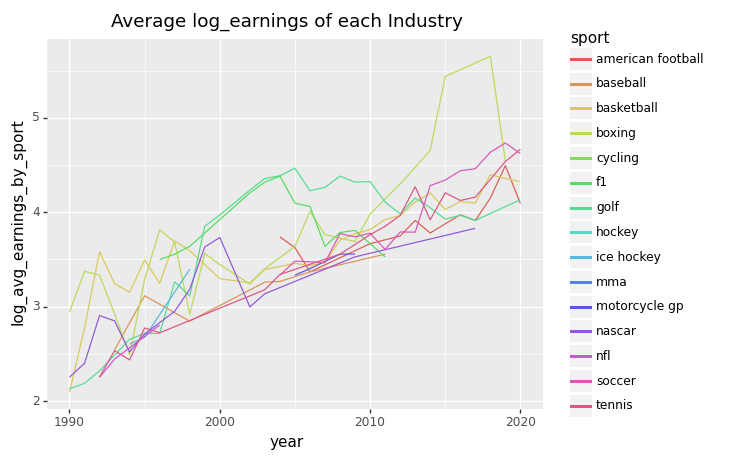

<ggplot: (137740647903)>

In [101]:
# plot the trends of average earnings in each industry
(ggplot(df_afQ2, aes(x='year', y='log_avg_earnings_by_sport', color = 'sport')) + 
geom_line() + labs(title='Average log_earnings of each Industry')
)   

In [128]:
#lets see for example how the top 3 most frequent player's earnings compare to their industry average
df['name'].value_counts().head(5)

Tiger Woods           19
Michael Jordan        19
Kobe Bryant           14
LeBron James          13
Michael Schumacher    13
Name: name, dtype: int64

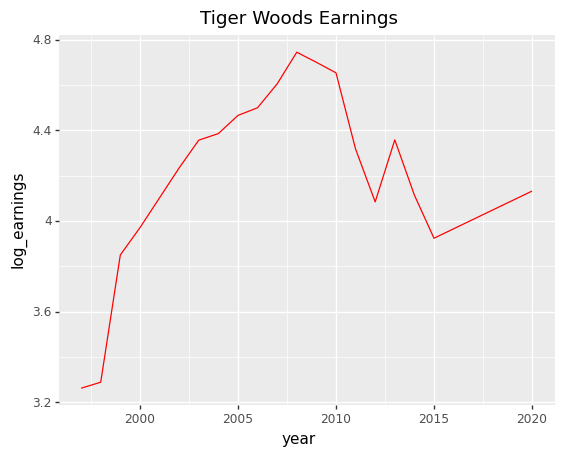

<ggplot: (137735545323)>

In [121]:
#Now we plot the trends of individual top earners of each sport versus their sport earning average
#this for example is the yearly earnings of tiger woods
(ggplot(df_afQ2.loc[df_afQ2['name'] =='Tiger Woods'], aes(x='year', y='log_earnings')) + 
    geom_line(color='red') + labs(title='Tiger Woods Earnings')
)   

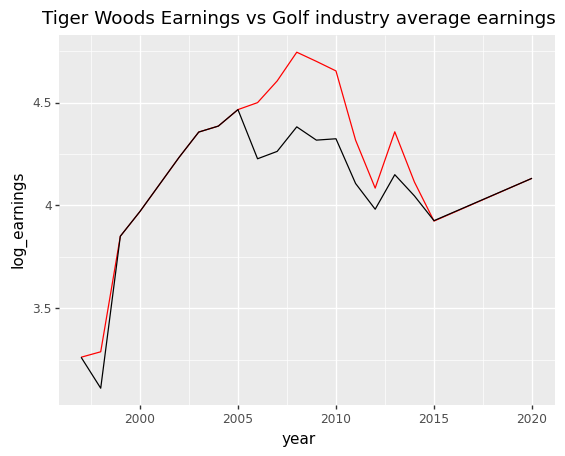

<ggplot: (137735473351)>

In [123]:
#this is Tiger wood's average earnings compared to indusrty average
(ggplot(df_afQ2.loc[df_afQ2['name'] =='Tiger Woods'], aes(x='year', y='log_earnings')) + 
    geom_line(color= 'red') + 
    geom_line(aes(x='year', y='log_avg_earnings_by_sport')) + labs(title='Tiger Woods Earnings vs Golf industry average earnings')
)   

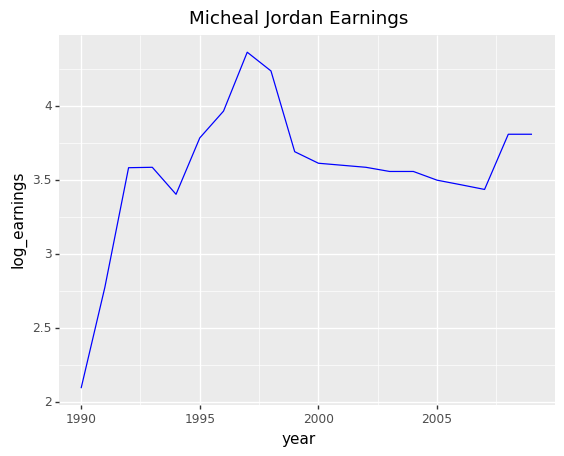

<ggplot: (137734763530)>

In [124]:
(ggplot(df_afQ2.loc[df_afQ2['name'] =='Michael Jordan'], aes(x='year', y='log_earnings')) + 
    geom_line(color= 'blue') + labs(title='Micheal Jordan Earnings')
)   

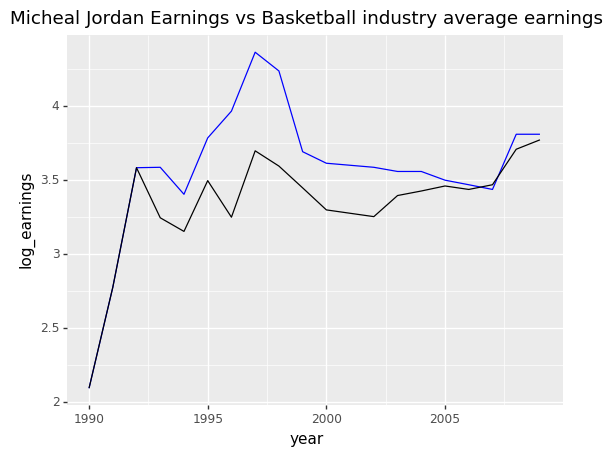

<ggplot: (137739748346)>

In [125]:
(ggplot(df_afQ2.loc[df_afQ2['name'] =='Michael Jordan'], aes(x='year', y='log_earnings')) + 
    geom_line(color = 'blue') + 
    geom_line(aes(x='year', y='log_avg_earnings_by_sport')) + labs(title='Micheal Jordan Earnings vs Basketball industry average earnings')
)   

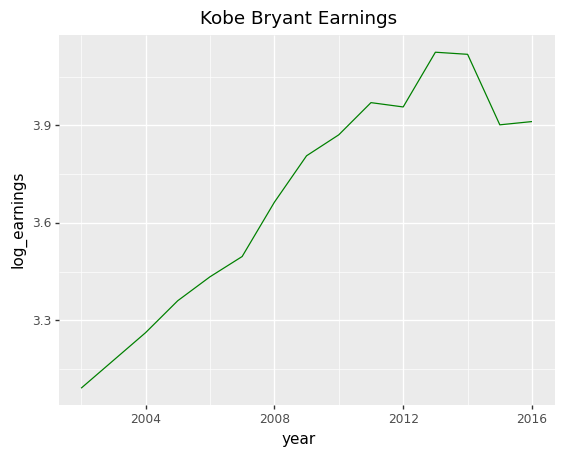

<ggplot: (137735485715)>

In [126]:
(ggplot(df_afQ2.loc[df_afQ2['name'] =='Kobe Bryant'], aes(x='year', y='log_earnings')) + 
    geom_line(color = 'green') + labs(title='Kobe Bryant Earnings')
)   

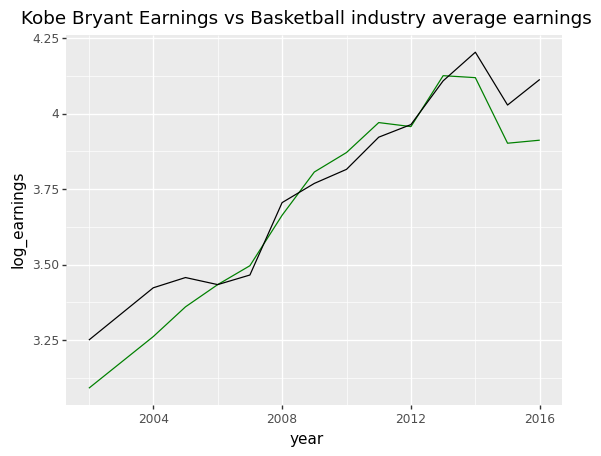

<ggplot: (137739108858)>

In [127]:
(ggplot(df_afQ2.loc[df_afQ2['name'] =='Kobe Bryant'], aes(x='year', y='log_earnings')) + 
    geom_line(color = 'green') + 
    geom_line(aes(x='year', y='log_avg_earnings_by_sport')) + labs(title='Kobe Bryant Earnings vs Basketball industry average earnings')
)   

#### We can see that individual's earnings does seem to track closely to their sport's earnings as a whole, but much of that may be due to the small sample size: for example there aren't that many top earners in one given sport per year, so the average of the sport per year is often dictated by just a few players. 

#### Nonethelss for our playes with the most numerous top earning spots, thde don't deviate too radically

# 3. Nationality

### Hypothesis (1) How the diversification of countries of top earners have changed over time

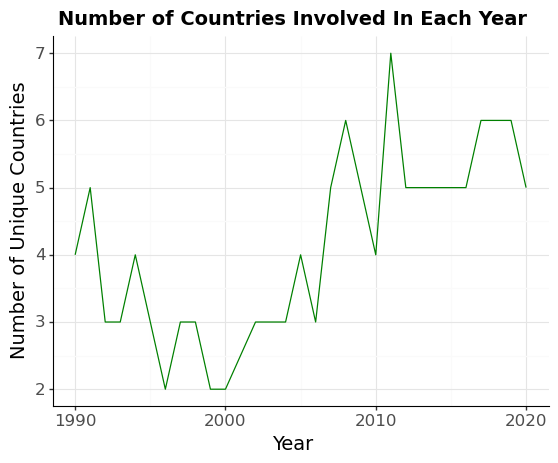

<ggplot: (8766443124622)>

In [287]:
# graph of number of unique countries in each year (countries per year)
cpy_graph = df.groupby(['year', 'nationality']).size()
cpy_df = cpy_graph.reset_index()
cpy_graph2 = cpy_df.groupby('year')['nationality'].count()
cpy_df2 = cpy_graph2.reset_index()
cpy_df2 = cpy_df2.rename(columns={'nationality': 'num_countries'})
# cpy_df2

(ggplot(cpy_df2, aes(x='year', y='num_countries'))
 + geom_line(color='green')
 + labs(title='Number of Countries Involved In Each Year', x='Year', y='Number of Unique Countries')
 + theme_bw()
 + theme(plot_title=element_text(weight='bold', size=14),
         axis_text=element_text(size=12),
         axis_title=element_text(size=14),
         panel_border=element_blank(),
         axis_line=element_line(size=.8)))


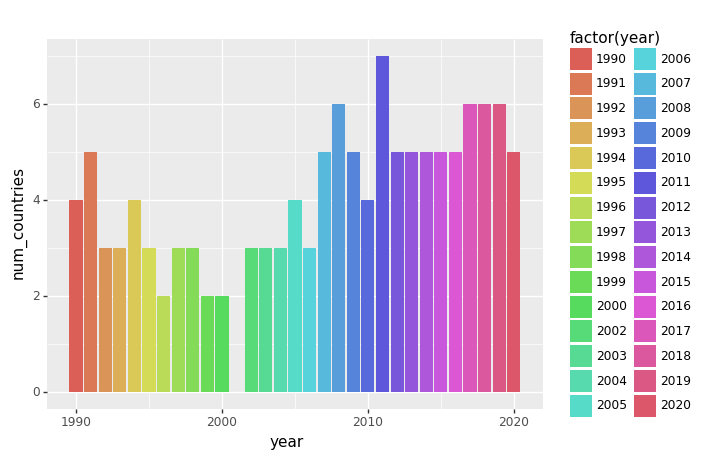

<ggplot: (8766475304120)>

In [288]:
# Let's visualize this another way

# (ggplot(cpy_df2, aes(x='year'))+
#  geom_histogram(fill='darkorange')+
#  theme_bw()
# )


cpy_df2


ggplot(cpy_df2, aes(x='year', y='num_countries', fill='factor(year)')) + \
    geom_bar(stat='identity')
    # scale_fill_manual(values=['green']) + \
    # labs(title='Green Bar Graph', x='X', y='Y')

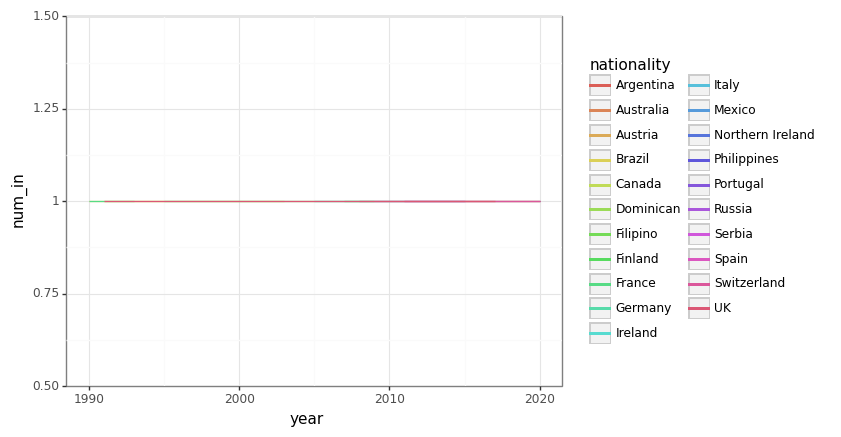

<ggplot: (8766443209027)>

In [289]:
# scatter plot with y on number from country in year and x as year
cpy_df = cpy_df.rename(columns={0: 'num_in'})

(ggplot(data=cpy_df.loc[cpy_df['nationality'] != 'USA'], mapping=aes(x='year', y='num_in', color='nationality'))+
 geom_line()+
 theme_bw())

This doesn't really say a lot because they all fluctuate between 1

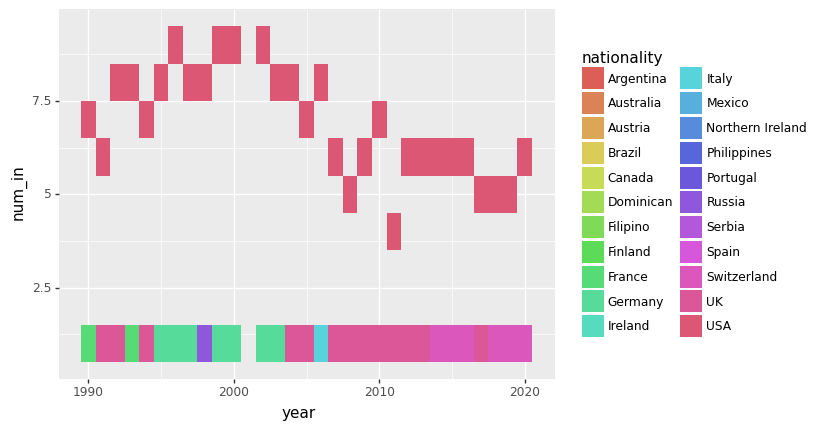

<ggplot: (8766457084179)>

In [290]:
(ggplot(data=cpy_df, mapping= aes(x='year', y='num_in', fill='nationality'))+
 geom_tile()
 )


Again, the problem is that these don't say anything about the non-USA countries, so let's create a bar graph of the number of years each country is in.

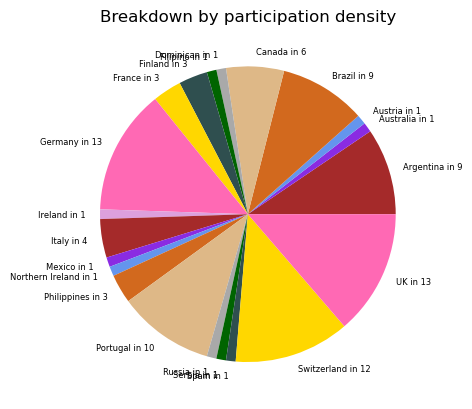

In [291]:
cpy_graph3 = cpy_df.loc[cpy_df['nationality'] != 'USA'].groupby('nationality')['num_in'].count()
cpy_df3 = cpy_graph3.reset_index()
# cpy_df3 = cpy_df3.rename(columns={'nationality': 'num_countries'})



colors = ["#A52A2A", "#8A2BE2", "#6495ED", "#D2691E", "#DEB887",
          "#A9A9A9", "#006400", "#2F4F4F", "#FFD700", "#FF69B4", "#DDA0DD"]
labels = [f"{sport} in {num_in}"
          for sport, num_in in zip(cpy_df3["nationality"], cpy_df3['num_in'])]

plt.pie(cpy_df3['num_in'], labels=labels,
       colors=colors, textprops={"fontsize": 6})
plt.title("Breakdown by participation density")
plt.show()

With all of this data, it is possible to conclude that the number of countries involved in the highest earnings sports has increased over the years and continues to have a projected growth.

### Hypothesis (2) Which industries have what nationalities and national density?

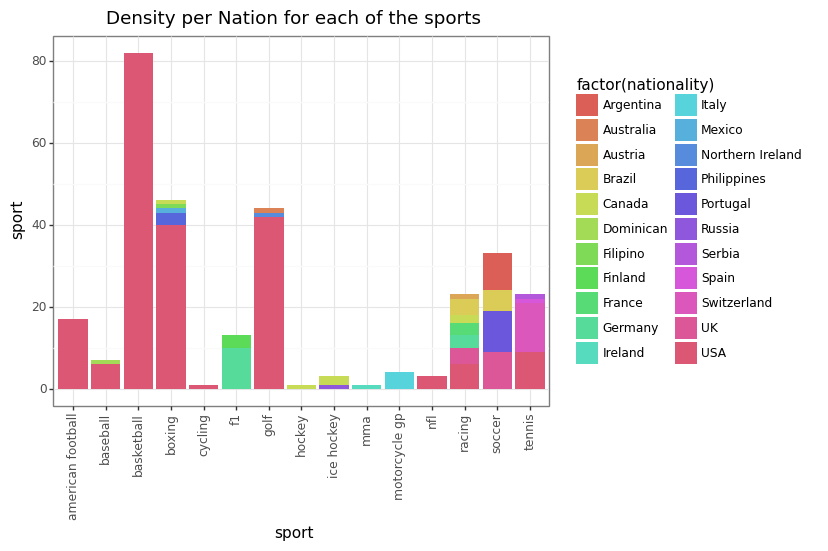

<ggplot: (8766443972250)>

In [292]:
# foreach sport, what countries make up the most

(ggplot(data=df, mapping=aes(x="sport", fill="factor(nationality)"))+
 geom_bar()+
 xlab("sport")+
 ylab("sport")+
 ggtitle("Density per Nation for each of the sports")+
 theme(figure_size=(11,5))+
 theme_bw()+
 theme(axis_text_x=element_text(rotation=90))
)

It is very clear from this that the United States dominates a large percentage of these categories. This brings about the <b>question...</b> of how much of each sport as a percentage does the US hold?

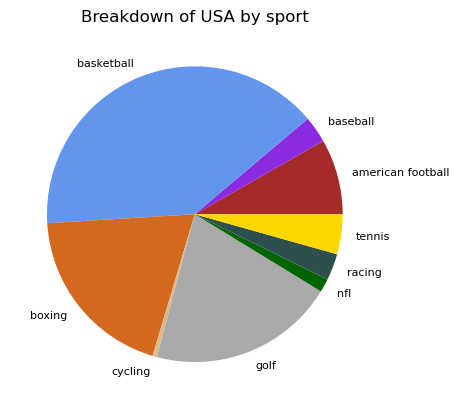

In [293]:
# create new dataframe for each sport where second column is number us has

colors = ["#A52A2A", "#8A2BE2", "#6495ED", "#D2691E", "#DEB887",
          "#A9A9A9", "#006400", "#2F4F4F", "#FFD700", "#FF69B4", "#DDA0DD"]

usa_density_per_sport = df.loc[df['nationality'] == 'USA'].groupby('sport')['nationality'].count()
udps_df = usa_density_per_sport.reset_index()
udps_df = udps_df.rename(columns={'nationality': 'sum_american'})
udps_df

labels = [sport 
          for sport in udps_df["sport"]]

plt.pie(udps_df['sum_american'], labels=labels,
       colors=colors, textprops={"fontsize": 8})
plt.title("Breakdown of USA by sport")
plt.show()

So, it's easy to see that not only does the US champion earnings but basketball is the biggest section in US. This leads to the conclusion that basketball is one of the highest earning sports which we'll test later. At this point, we wanted to see how the US has changed it's involvement over time and what the density is without Americans. 

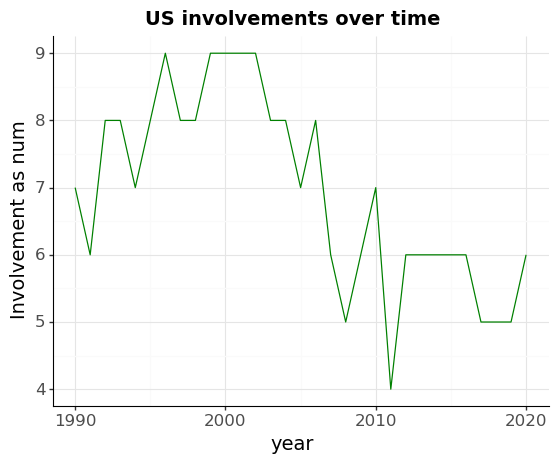

<ggplot: (8766422681104)>

In [294]:
usa_growth = df.loc[df['nationality'] == 'USA'].groupby('year')['sport'].count()
usgw_df = usa_growth.reset_index()
usgw_df = usgw_df.rename(columns={'sport': 'involvement'})
usgw_df

(ggplot(usgw_df, aes(x='year', y='involvement'))
 + geom_line(color='green')
 + labs(title='US involvements over time', x='year', y='Involvement as num')
 + theme_bw()
 + theme(plot_title=element_text(weight='bold', size=14),
         axis_text=element_text(size=12),
         axis_title=element_text(size=14),
         panel_border=element_blank(),
         axis_line=element_line(size=.8)))

Now, let's get down to seeing the density by sports with America not in the mix...

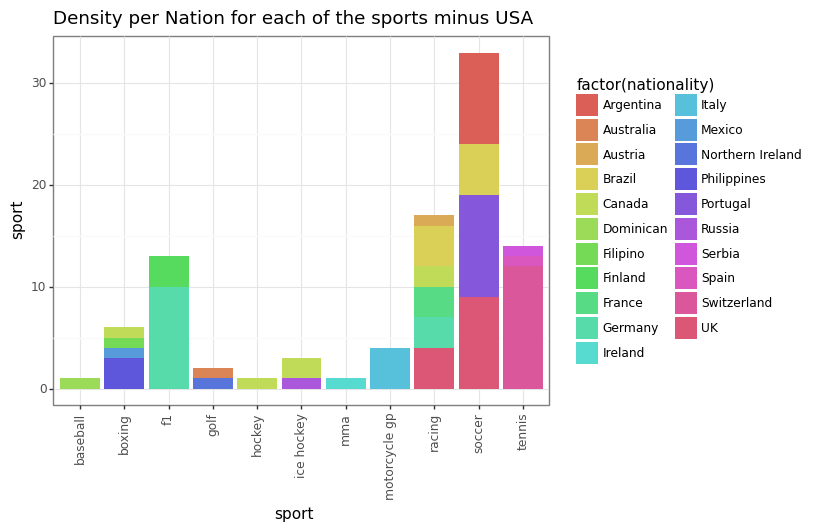

<ggplot: (8766457182889)>

In [295]:
(ggplot(data=df.loc[df['nationality'] != 'USA'], mapping=aes(x="sport", fill="factor(nationality)"))+
 geom_bar()+
 xlab("sport")+
 ylab("sport")+
 ggtitle("Density per Nation for each of the sports minus USA")+
 theme(figure_size=(11,5))+
 theme_bw()+
 theme(axis_text_x=element_text(rotation=90))
)

### Hypothesis (3) Which countries are bringing in the highest percentage of earnings over time

First, let's visualize the total earnings by countries over time. This is important to see how the numbers are changing by countries in total.

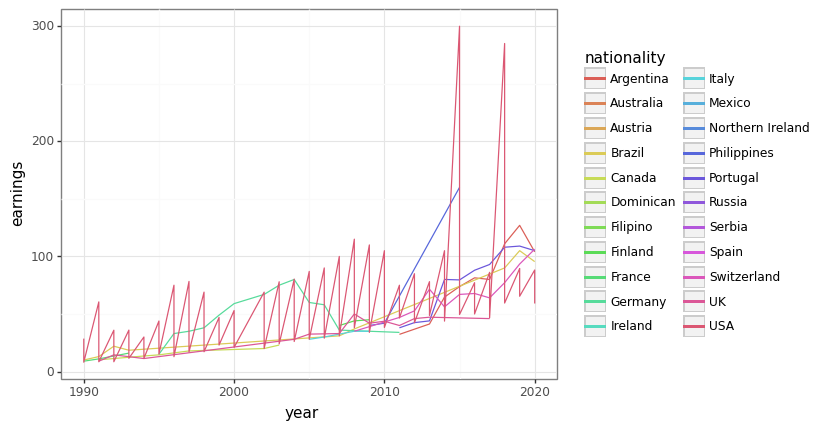

<ggplot: (8766443198958)>

In [296]:
(ggplot(data=df, mapping=aes(x='year', y='earnings', color='nationality'))+
 geom_line()+
 theme_bw())


Wow, that's fascinating for a few reasons. First of all, the US is very shifty, constantly going from higher years to lower years on earnings and other countries tend to change at more constant factors. <br>Let's display one without the United States

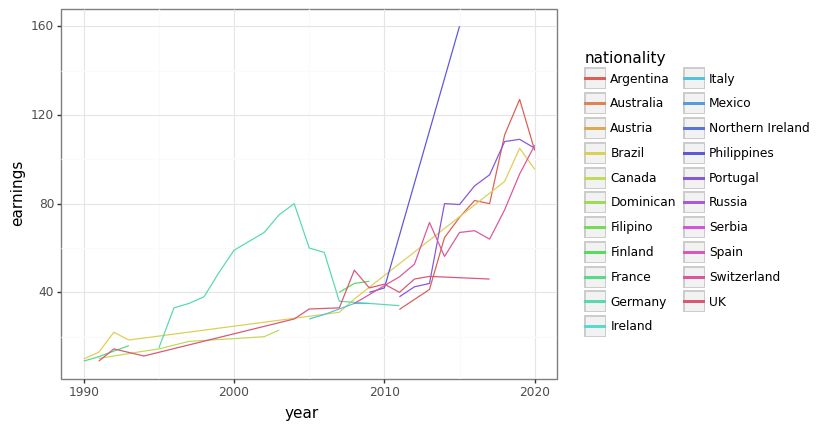

<ggplot: (8766457025518)>

In [297]:
(ggplot(data=df.loc[df['nationality'] != 'USA'], mapping=aes(x='year', y='earnings', color='nationality'))+
 geom_line()+
 theme_bw())


Again, I'm curious about what portion of earnings is brought in by the United States. Let's figure this out by creating a bar graph on total earnings by countries.

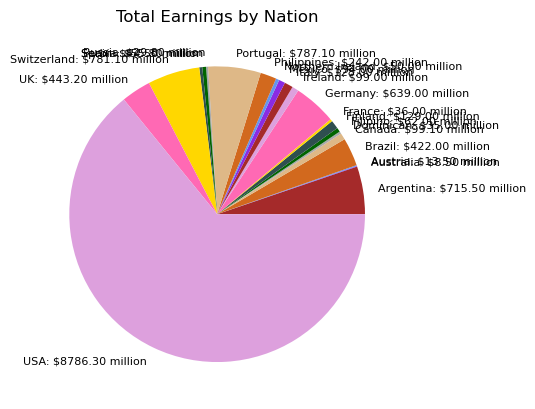

In [298]:
colors = ["#A52A2A", "#8A2BE2", "#6495ED", "#D2691E", "#DEB887",
          "#A9A9A9", "#006400", "#2F4F4F", "#FFD700", "#FF69B4", "#DDA0DD"]

country_density = df.groupby('nationality')['earnings'].sum()
cydy_df = country_density.reset_index()
# udps_df = udps_df.rename(columns={'nationality': 'sum_american'})
cydy_df


labels = [f"{country}: ${earnings:.2f} million" 
          for country, earnings in zip(cydy_df["nationality"], 
                                    cydy_df["earnings"])]

plt.pie(cydy_df['earnings'], labels=labels,
       colors=colors, textprops={"fontsize": 8})
plt.title("Total Earnings by Nation")
plt.show()

Wow, that's a lot in the US and for the rest it's incredibly hard to see. Let's try this without the USA.

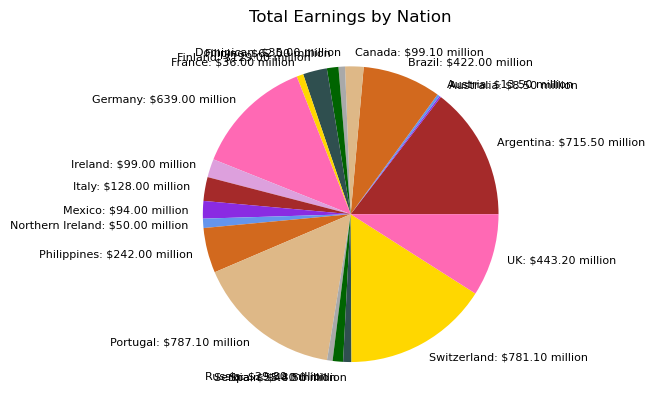

In [299]:
colors = ["#A52A2A", "#8A2BE2", "#6495ED", "#D2691E", "#DEB887",
          "#A9A9A9", "#006400", "#2F4F4F", "#FFD700", "#FF69B4", "#DDA0DD"]

country_density = df.loc[df['nationality'] != 'USA'].groupby('nationality')['earnings'].sum()
cydy_df = country_density.reset_index()
# udps_df = udps_df.rename(columns={'nationality': 'sum_american'})
cydy_df


labels = [f"{country}: ${earnings:.2f} million" 
          for country, earnings in zip(cydy_df["nationality"], 
                                    cydy_df["earnings"])]

plt.pie(cydy_df['earnings'], labels=labels,
       colors=colors, textprops={"fontsize": 8})
plt.title("Total Earnings by Nation")
plt.show()

This is still incredibly hard to see. So let's try one more method to do this

### (extra) FUN Findings:
Are there any countries for which the US did not have a member in the top earnings?

In [300]:
cpy_df
lst_years = cpy_df['year']
lst_unique_yrs = []
for i in lst_years:
    if(i not in lst_unique_yrs):
        lst_unique_yrs.append(i)

    
lst_us_not_in = []
for i in lst_unique_yrs:
    lst_nations = (cpy_df.loc[cpy_df['year'] == i])['nationality']
    
    usa_in = False
    for j in lst_nations:
        if(j == 'USA'):
            usa_in = True
            
    if(usa_in != True):
        lst_us_not_in.append(i)
        

print(lst_us_not_in)

[]


This indicates clearly that the United States is involved in the highest earnings of each year, and is a powerhouse of this.

### Analysis of overall Findings within Nationality

There's a lot to take from all of this data. In a big part, we see the dominance of the United States sports scene, involved in every year, and in a major way. However, we also see a pick up in the diversity of nations both in the amount of people on the board and their earnings indicating that there is a possibility that sports are becoming more globally visible and powerful. Finally, we've also seen how sports are really involved in their nations. Some sports are solely in one nation and others are diversified. This leans to the interesting possibility that sports really are liked by different areas of the world. Canada and Russia dominate in Ice Hockey so it's not a surprise that they dominate in earnings just like the USA with basketball. However, other sports like racing and soccer seem to have a very global appeal. Very interesting.

# 4. Ranking Sport Developments

Jesse's Portion: Sports Analysis

Hypotheses:

1. How does the distribution of different sports compare to the distribution of the best players?

2. How has earnings between sports in general compare to the earnings of the top players?

3. How does each sports' number of different ranks contribute to quality of the sport (e.g. earnings)?

## **Hypothesis 1**: How does the distribution of different sports compare to the distribution of the best players?

* Continuing Earnings Analysis of regular players vs. top players by applying concept to sports
* Elaborating on graph made in Individual Players Hypothesis 2 about sport distribution over time

Defining a col name count to groupby

In [393]:
df['count'] = 1
df

,s.no,name,nationality,current_rank,previous_year_rank,sport,year,earnings,count
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6,1
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0,1
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0,1
3,4,Ayrton Senna,Brazil,4,NaN,nascar,1990,10.0,1
4,5,Alain Prost,France,5,NaN,nascar,1990,9.0,1
...,...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,basketball,2020,74.4,1
297,298,Kevin Durant,USA,7,10,basketball,2020,63.9,1
298,299,Tiger Woods,USA,8,11,golf,2020,62.3,1
299,300,Kirk Cousins,USA,9,>100,american football,2020,60.5,1


Calculate sport average salary which is the average earnings per sport the sum of all different sports

In [394]:
sport_avg_salary = df.groupby(['sport']).agg({'earnings': 'mean', 'count': 'sum'}).reset_index()
sport_avg_salary

,sport,earnings,count
0,american football,53.011765,17
1,baseball,24.085714,7
2,basketball,41.869512,82
3,boxing,49.973913,46
4,cycling,28.000000,1
5,f1,49.615385,13
6,golf,48.556818,44
7,hockey,17.900000,1
8,ice hockey,19.266667,3
9,mma,99.000000,1


rank_1 does the same (average for earnings and sum of sports for all different sports) for rank 1 players

In [395]:
rank_1 = df[df['current_rank']==1]
rank_1_name = rank_1.groupby(['sport']).agg({'earnings':'mean', 'count': 'sum'}).reset_index()
rank_1_name

,sport,earnings,count
0,basketball,48.850000,6
1,boxing,134.157143,7
2,golf,89.763636,11
3,nascar,54.000000,2
4,soccer,102.666667,3
5,tennis,106.300000,1


Average Distribution of Sport Peoples' Pie Chart

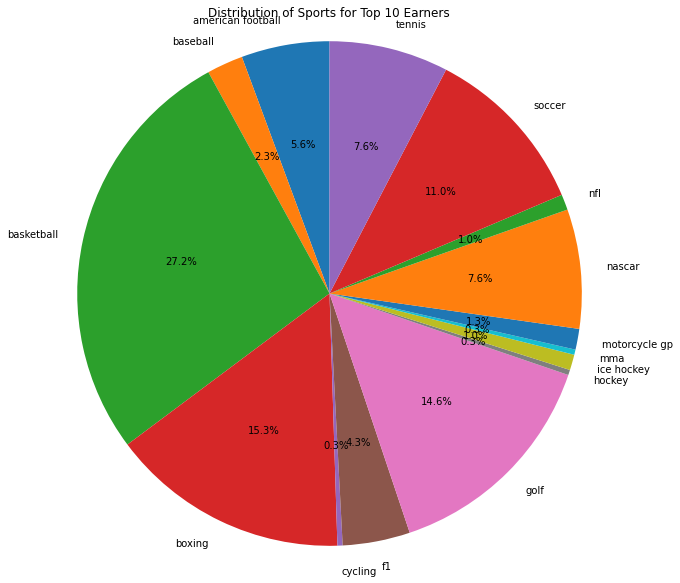

In [396]:
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sport_avg_salary['count'], labels=sport_avg_salary['sport'] , autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

# add title
plt.title('Distribution of Sports for Top 10 Earners')

# show plot
plt.show()

Observations and Analysis:
* basketball is the most dense in our dataset - This means that basketball averages (e.g. for salary) will be more distribution and therefore a more accurate of the current average for earners in top 10
* There are sports with minimal data on relative to other major sports such as: baseball, american football, hockey, and mma - This is important to keep in mind when comparing it with other similarily popular sports as these specifc sports might be particularly skewed in some way
* Lastly, there are obvious less popular sports which would have been assumed to have taken up only a small fraction of the data set such as motorcycle gp and cycling  

Top 1 Earners' Distribution For Sports

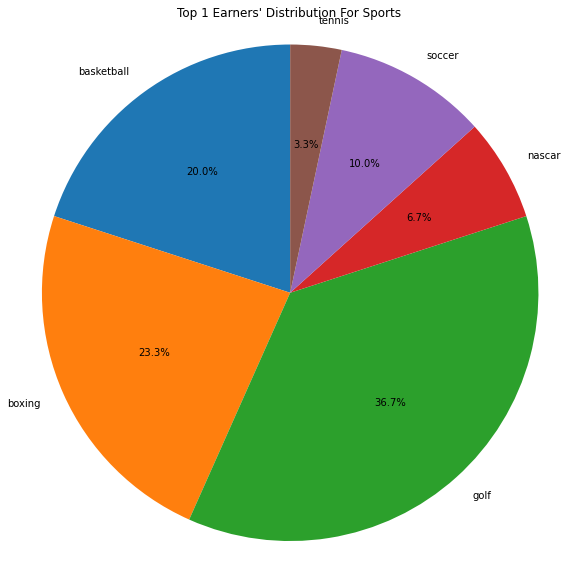

In [397]:
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(rank_1_name['count'], labels=rank_1_name['sport'] , autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

# add title
plt.title('''Top 1 Earners' Distribution For Sports''')

# show plot
plt.show()

Observations and Analysis:
* Golf grew tremendiously compared to the previous graph effectivley saying that a third of the top earners throughout the years came from golf - This leads to predict that golf will have the highest average salary. 
* All other feilds such as boxing, soccer, nascar, tennis, and basketball did not really change thier distribution in the dataset as we narrowed down only to top 1 players

Lets' look at the amount of top earners per sport and by whom 

In [398]:
best_players = df[df['current_rank']==1].groupby(['sport','name']).sum()
best_players = best_players.reset_index()
best_players

,sport,name,s.no,current_rank,year,earnings,count
0,basketball,Michael Jordan,296,6,11969,293.1,6
1,boxing,Evander Holyfield,11,1,1991,60.5,1
2,boxing,Floyd Mayweather,958,4,8059,775.0,4
3,boxing,Mike Tyson,62,2,3986,103.6,2
4,golf,Tiger Woods,1791,11,22078,987.4,11
5,nascar,Michael Schumacher,192,2,3999,108.0,2
6,soccer,Cristiano Ronaldo,514,2,4033,181.0,2
7,soccer,Lionel Messi,282,1,2019,127.0,1
8,tennis,Roger Federer,292,1,2020,106.3,1


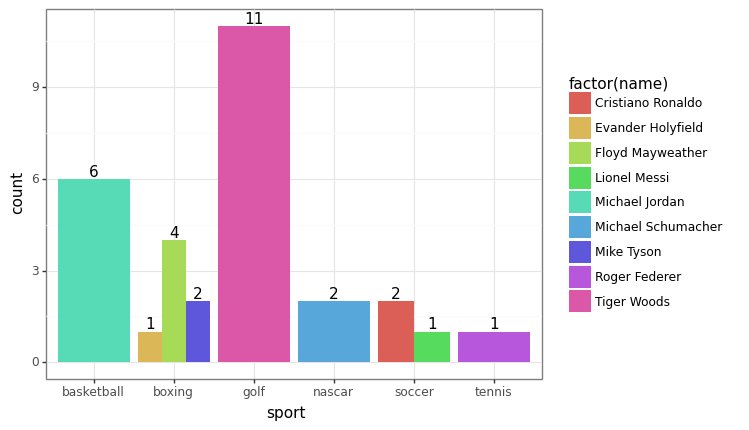

<ggplot: (121910131996)>

In [399]:
#Maybe we can try that again...
# VERY IMPORTANT SINCE IT IS ONE OF THE FIRST QUESTIONS WHCIH ARE ASKED WHEN SEEN SOMETING INTERESING
(ggplot(data=best_players, mapping=aes(x="sport",y='count', fill="factor(name)"))+
 geom_col(position='dodge')+
 geom_text(mapping=aes(label='count'),
           #this means the string in the text we are adding has 2 decimals only
           format_string='{:.0f}',
           #this makes sure that each label is separated and goes to each bar
           position=position_dodge(width=.9),
                  va="bottom")+

 
theme_bw())

Analysis and Observation:
* Wow! It seems that there only one star player in golf that is pulling up the distribtion to 30%.
* This is the same with basketball
* most of the other sports have few and far between top earners 
* This may mean that this person, Tiger Woods, is paid very well for what he does - however we cannot make generalizations about the sport itself

Observations:
* Probibley would be better to compare both top and not top tier players with only bottom in order not to have such as small sample size

In [425]:
sport_avg_salary_without_rank_1 = df[df.current_rank!=1]
sport_avg_salary_without_rank_1 = sport_avg_salary_without_rank_1.groupby(['sport']).agg({'earnings': 'mean', 'count': 'sum'}).reset_index()
sport_avg_salary_without_rank_1

,sport,earnings,count
0,american football,53.011765,17
1,baseball,24.085714,7
2,basketball,41.318421,76
3,boxing,34.864103,39
4,cycling,28.000000,1
5,f1,49.615385,13
6,golf,34.821212,33
7,hockey,17.900000,1
8,ice hockey,19.266667,3
9,mma,99.000000,1


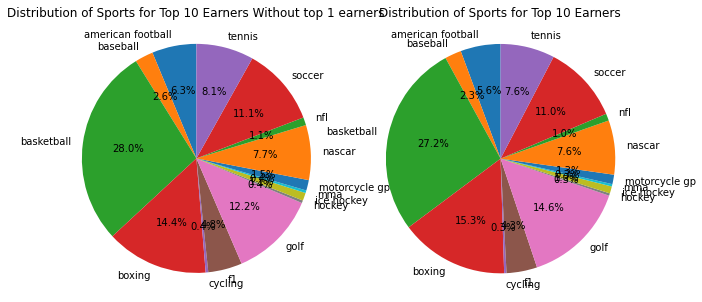

In [426]:

fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=(10, 5))

# Create the first pie chart
ax1.pie(sport_avg_salary_without_rank_1['count'], labels=sport_avg_salary_without_rank_1['sport'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
ax1.set_title('Distribution of Sports for Top 10 Earners Without top 1 earners')

# Create the second pie chart
ax2.pie(sport_avg_salary['count'], labels=sport_avg_salary['sport'], autopct='%1.1f%%', startangle=90)
ax2.axis('equal')
ax2.set_title('Distribution of Sports for Top 10 Earners')

# Display the plots
plt.show()

Observations:
* Nevermind the top 1 players make up a very small percentage of the actual data

## ***Hypothesis 2***: How has earnings between sports in general compare to the earnings of the top players? 

* Adding onto previous work done in hypothesis 2 of earnings

In [427]:
# adding column called best to seperate rank 1 from not rank 1 when concatenating both
rank_1_name['best']='Yes'
sport_avg_salary['best']='No'
best_and_not_best = pd.concat([rank_1_name, sport_avg_salary])
best_and_not_best

,sport,earnings,count,best
0,basketball,48.850000,6,Yes
1,boxing,134.157143,7,Yes
2,golf,89.763636,11,Yes
3,nascar,54.000000,2,Yes
4,soccer,102.666667,3,Yes
5,tennis,106.300000,1,Yes
0,american football,53.011765,17,No
1,baseball,24.085714,7,No
2,basketball,41.869512,82,No
3,boxing,49.973913,46,No


In [428]:
# dont need count for this analysis
best_and_not_best = best_and_not_best.drop('count',axis=1)

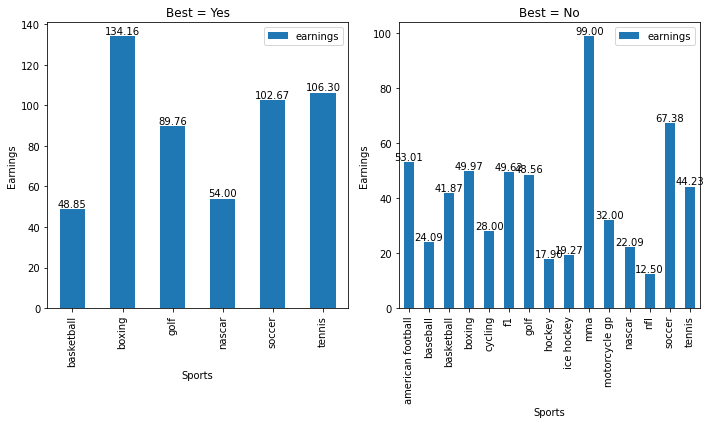

In [429]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# create plots for 'Yes' and 'No' groups
best_and_not_best[best_and_not_best['best'] == 'Yes'].plot(kind='bar', x='sport', y='earnings', ax=axes[0])
best_and_not_best[best_and_not_best['best'] == 'No'].plot(kind='bar', x='sport', y='earnings', ax=axes[1])

# set subplot titles and labels
axes[0].set_title('Best = Yes')
axes[1].set_title('Best = No')
axes[0].set_xlabel('Sports')
axes[1].set_xlabel('Sports')
axes[0].set_ylabel('Earnings')
axes[1].set_ylabel('Earnings')

# add earnings labels on top of the bars
for ax in axes:
    for p in ax.patches:
        ax.annotate(f"{p.get_height():,.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# adjust subplot layout
plt.tight_layout()

# display plot
plt.show()


Let's Narrow it only to relevant sports

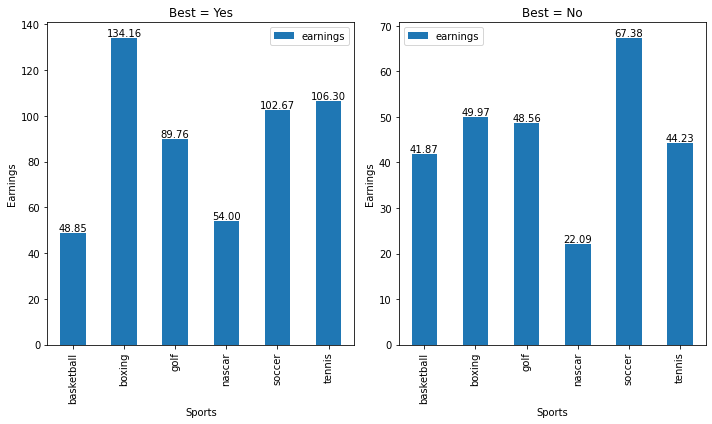

In [437]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# create plots for 'Yes' and 'No' groups
best_and_not_best[(best_and_not_best['best'] == 'Yes')].plot(kind='bar', x='sport', y='earnings', ax=axes[0])
best_and_not_best[(best_and_not_best['best'] == 'No')&(best_and_not_best.sport.isin(['basketball','boxing','golf','nascar','soccer','tennis']))].plot(kind='bar', x='sport', y='earnings', ax=axes[1])

# set subplot titles and labels
axes[0].set_title('Best = Yes')
axes[1].set_title('Best = No')
axes[0].set_xlabel('Sports')
axes[1].set_xlabel('Sports')
axes[0].set_ylabel('Earnings')
axes[1].set_ylabel('Earnings')

# add earnings labels on top of the bars
for ax in axes:
    for p in ax.patches:
        ax.annotate(f"{p.get_height():,.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# adjust subplot layout
plt.tight_layout()

# display plot
plt.show()


Observations and Analysis
* Baketball: Increase in Avg. Salary from 41 to 48 for top 1 earners not so much increase
* Boxing: Crazy increase! boxing increased its average from around two to three times its orginal salary! 50 to 135. However (see above) there wasnt an insane increase in a distribution of top earners. This suggests that few inidviduals get paid very handsomely in boxing!
* Golf increased considerably 
* This is interesing it seems that mma is way higher in salaries.

* Not equal so the sports with less representation will are less accurate for a mean. For example, it can be possible that mma fighting might be less accurate than basketball given the fact that there is a significanltly less representation from mma. This can possibly scew the number as seen above

Still seems skewed because of the fact that there are few top player so compare avg. salaries with and without the top tier players

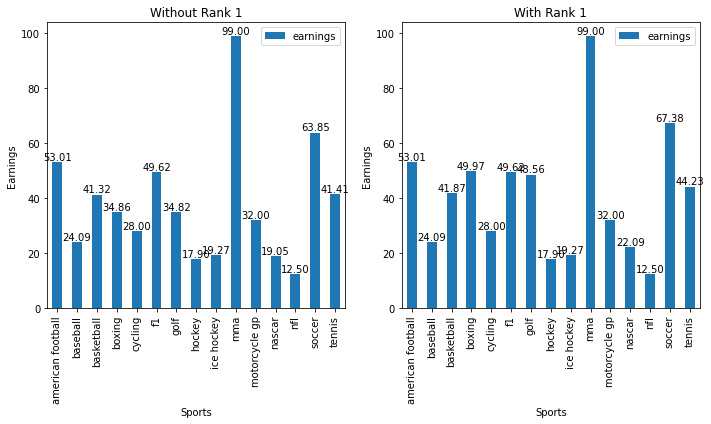

In [430]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# create plots for 'Yes' and 'No' groups
sport_avg_salary_without_rank_1.plot(kind='bar', x='sport', y='earnings', ax=axes[0])
sport_avg_salary.plot(kind='bar', x='sport', y='earnings', ax=axes[1])

# set subplot titles and labels
axes[0].set_title('Without Rank 1')
axes[1].set_title('With Rank 1')
axes[0].set_xlabel('Sports')
axes[1].set_xlabel('Sports')
axes[0].set_ylabel('Earnings')
axes[1].set_ylabel('Earnings')

# add earnings labels on top of the bars
for ax in axes:
    for p in ax.patches:
        ax.annotate(f"{p.get_height():,.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# adjust subplot layout
plt.tight_layout()

# display plot
plt.show()

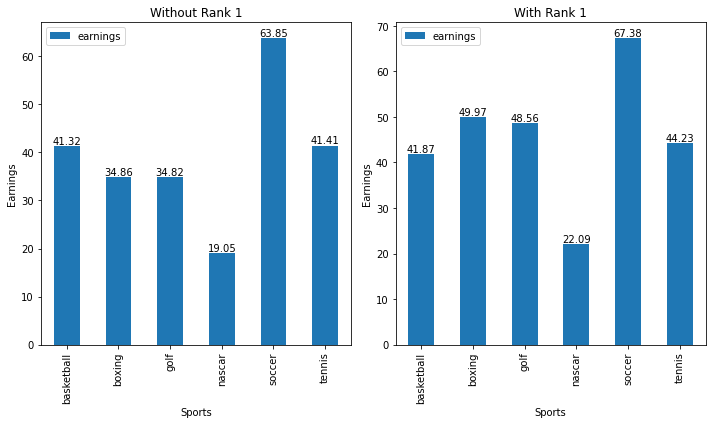

In [440]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# create plots for 'Yes' and 'No' groups
sport_avg_salary_without_rank_1[sport_avg_salary_without_rank_1.sport.isin(['basketball','boxing','golf','nascar','soccer','tennis'])].plot(kind='bar', x='sport', y='earnings', ax=axes[0])
sport_avg_salary[sport_avg_salary.sport.isin(['basketball','boxing','golf','nascar','soccer','tennis'])].plot(kind='bar', x='sport', y='earnings', ax=axes[1])

# set subplot titles and labels
axes[0].set_title('Without Rank 1')
axes[1].set_title('With Rank 1')
axes[0].set_xlabel('Sports')
axes[1].set_xlabel('Sports')
axes[0].set_ylabel('Earnings')
axes[1].set_ylabel('Earnings')

# add earnings labels on top of the bars
for ax in axes:
    for p in ax.patches:
        ax.annotate(f"{p.get_height():,.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# adjust subplot layout
plt.tight_layout()

# display plot
plt.show()

## Hypothesis 3: How does each sports' number of different ranks contribute to quality of the sport (e.g. earnings)?

In [272]:
rank_df = df.groupby(['current_rank']).sum()
rank_df = rank_df.reset_index()

In [277]:
rank_df[['count']]

,count
0,30
1,32
2,30
3,28
4,32
5,32
6,28
7,30
8,34
9,25


Text(0.5, 1.0, 'Rank')

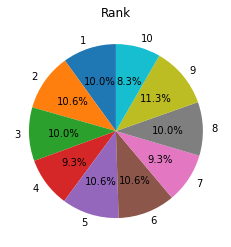

In [278]:
fig, ax = plt.subplots()
ax.pie(rank_df['count'], labels=rank_df['current_rank'], autopct='%1.1f%%', startangle=90)
ax.set_title('Rank')

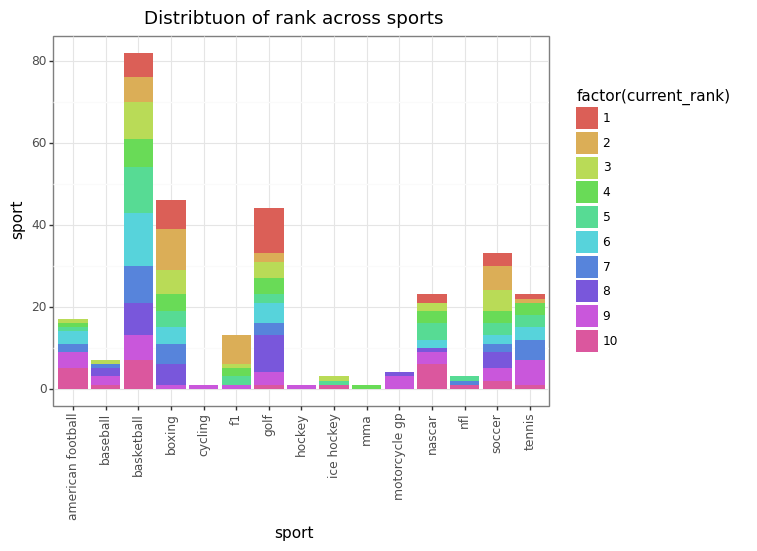

<ggplot: (121901586911)>

In [280]:
(ggplot(data=df, mapping=aes(x="sport", fill="factor(current_rank)"))+
 geom_bar()+
 xlab("sport")+
 ylab("sport")+
 ggtitle("Distribtuon of rank across sports")+
 theme(figure_size=(11,5))+
 theme_bw()+
 theme(axis_text_x=element_text(rotation=90))
)

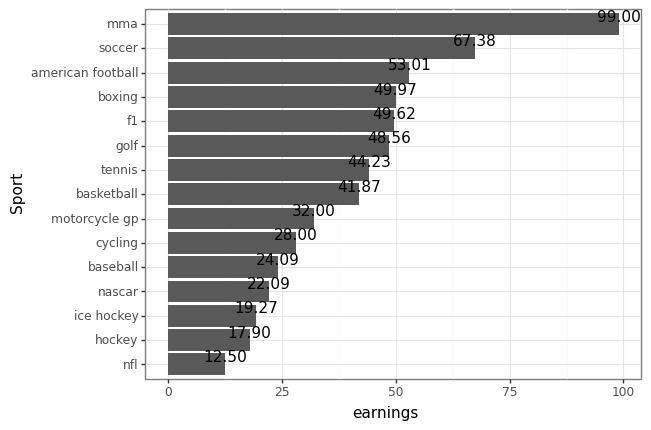

<ggplot: (121898586239)>

In [281]:
#Maybe we can try that again...
# VERY IMPORTANT SINCE IT IS ONE OF THE FIRST QUESTIONS WHCIH ARE ASKED WHEN SEEN SOMETING INTERESING
(ggplot(data=sport_avg_salary, mapping=aes(x="reorder(sport, earnings)",y='earnings'))+
 geom_col(position='dodge')+
 geom_text(mapping=aes(label="earnings"),
           #this means the string in the text we are adding has 2 decimals only
           format_string='{:.2f}',
           #this makes sure that each label is separated and goes to each bar
           position=position_dodge(width=.9),
                  va="bottom")+coord_flip()+xlab('Sport')+

 
theme_bw())

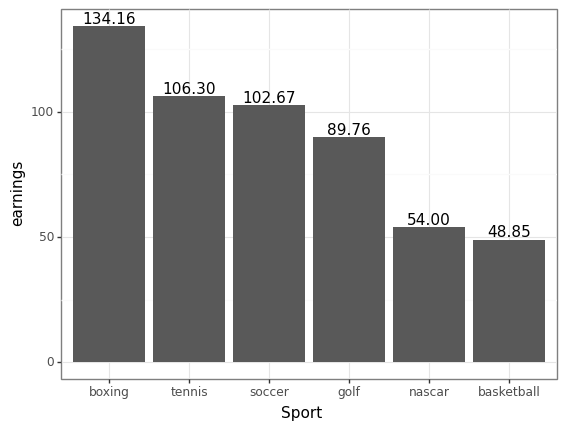

<ggplot: (121898964770)>

In [283]:
#Maybe we can try that again...
# VERY IMPORTANT SINCE IT IS ONE OF THE FIRST QUESTIONS WHCIH ARE ASKED WHEN SEEN SOMETING INTERESING
(ggplot(data=rank_1_name, mapping=aes(x="reorder(sport,-earnings)",y='earnings'))+
 geom_col(position='dodge')+
 geom_text(mapping=aes(label="earnings"),
           #this means the string in the text we are adding has 2 decimals only
           format_string='{:.2f}',
           #this makes sure that each label is separated and goes to each bar
           position=position_dodge(width=.9),
                  va="bottom")+xlab('Sport')+

 
theme_bw())

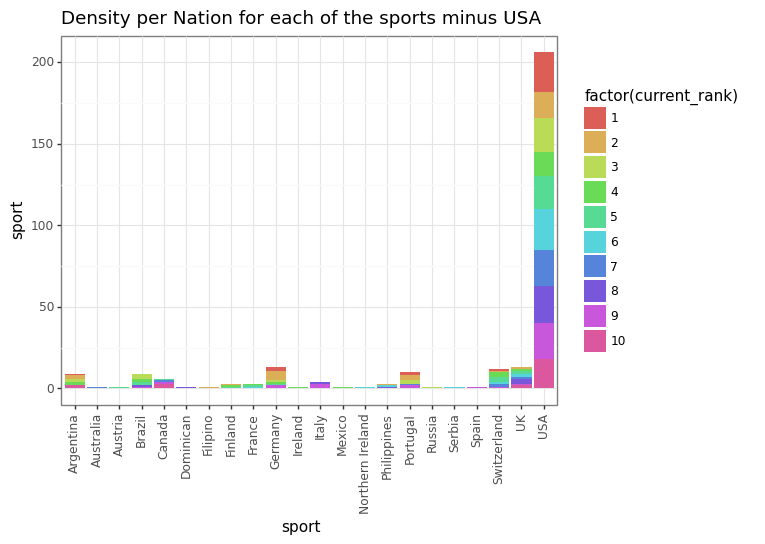

<ggplot: (121896978914)>

In [282]:
(ggplot(data=df, mapping=aes(x="nationality", fill="factor(current_rank)"))+
 geom_bar()+
 xlab("sport")+
 ylab("sport")+
 ggtitle("Density per Nation for each of the sports minus USA")+
 theme(figure_size=(11,5))+
 theme_bw()+
 theme(axis_text_x=element_text(rotation=90))
)

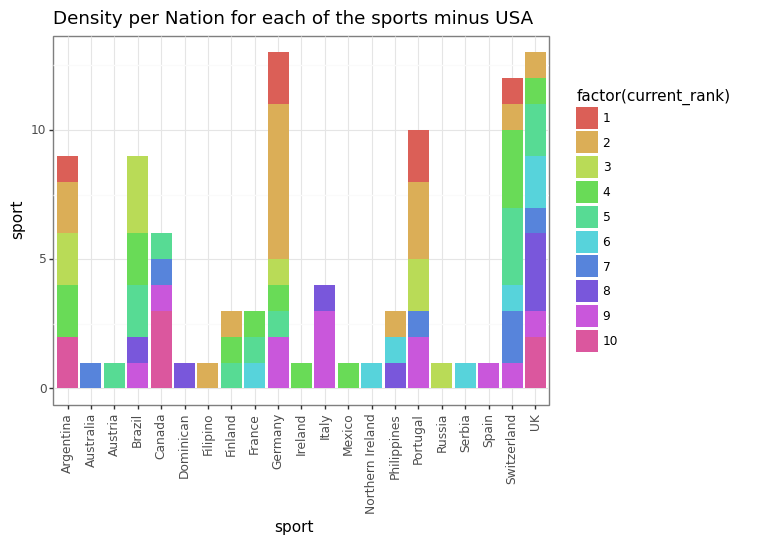

<ggplot: (121897636949)>

In [284]:
(ggplot(data=df.loc[df['nationality'] != 'USA'], mapping=aes(x="nationality", fill="factor(current_rank)"))+
 geom_bar()+
 xlab("sport")+
 ylab("sport")+
 ggtitle("Density per Nation for each of the sports minus USA")+
 theme(figure_size=(11,5))+
 theme_bw()+
 theme(axis_text_x=element_text(rotation=90))
)

Compare this with Nathans Graphs for Total Earnings by Nation with and without the UNited States! can see a pattern!

In [289]:
df

,s.no,name,nationality,current_rank,previous_year_rank,sport,year,earnings,count
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6,1
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0,1
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0,1
3,4,Ayrton Senna,Brazil,4,NaN,nascar,1990,10.0,1
4,5,Alain Prost,France,5,NaN,nascar,1990,9.0,1
...,...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,basketball,2020,74.4,1
297,298,Kevin Durant,USA,7,10,basketball,2020,63.9,1
298,299,Tiger Woods,USA,8,11,golf,2020,62.3,1
299,300,Kirk Cousins,USA,9,>100,american football,2020,60.5,1


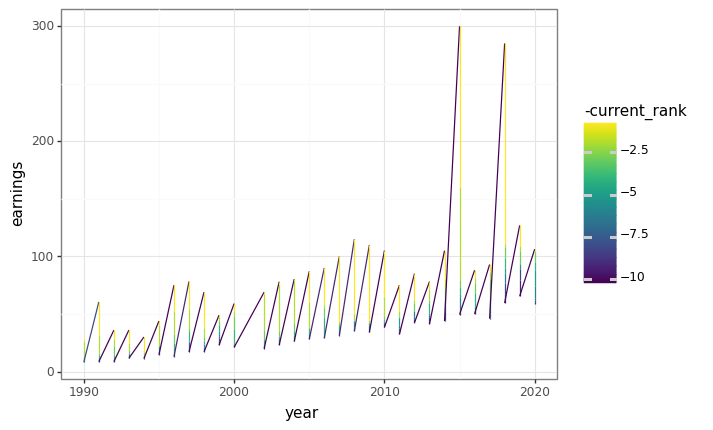

<ggplot: (121906178844)>

In [316]:
(ggplot(data=df, mapping=aes(x='year', y='earnings', color='-current_rank'))+
 geom_line()+
 theme_bw())


The reason why in nathans graph United States has been going up and down was because the current rank is falling after every interval

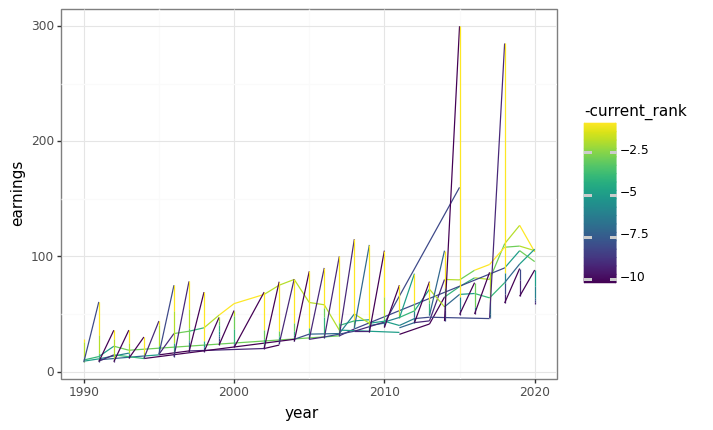

<ggplot: (121899782437)>

In [318]:
(ggplot(data=df, mapping=aes(x='year', y='earnings', color='-current_rank', group = 'nationality'))+
 geom_line()+
 theme_bw())


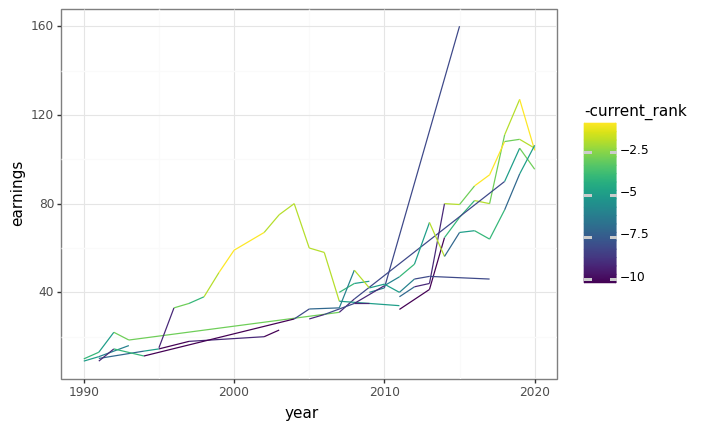

<ggplot: (121898960713)>

In [443]:
(ggplot(data=df.loc[df['nationality'] != 'USA'], mapping=aes(x='year', y='earnings', color='-current_rank', group = 'nationality'))+
 geom_line()+
 theme_bw())


What happened in 2000! It was rising but he stunk!

In [444]:
df[df['earnings']==80]

,s.no,name,nationality,current_rank,previous_year_rank,sport,year,earnings,count
132,133,Michael Schumacher,Germany,2,2,f1,2004,80.0,1
232,233,Cristiano Ronaldo,Portugal,2,9,soccer,2014,80.0,1
263,264,Lionel Messi,Argentina,3,2,soccer,2017,80.0,1


earning skyrocket after a current rank increases!

In [ ]:
# From the line graph above, we can see a general increasing trend with some outliers
# We can perform a regressional analysis on earnings in years
reg2_top1earnings = smf.ols('earnings~year',df_no1).fit() 
reg2_top1earnings.summary()
# Try using linear fregressions for all cartegorical varaibles

Run Linarear regression on sports vs. earings with current rnak

In [256]:
ax.pie(rank_df, labels=labels, autopct='%1.1f%%', startangle=90)

,sport,current_rank,s.no,year,earnings,count
0,american football,3,134,2004,42.0,1
1,american football,4,145,2005,37.5,1
2,american football,5,226,2013,51.0,1
3,american football,6,781,6049,188.5,3
4,american football,7,546,4035,142.4,2
...,...,...,...,...,...,...
78,tennis,5,748,6046,213.1,3
79,tennis,6,480,6018,109.8,3
80,tennis,7,778,10027,192.8,5
81,tennis,9,668,12004,136.5,6


Hypothesis 3: What will a regression show about the relationship between the sports and earnings 

Redoing Regression Previously tried in Invidiual characters Hypothesis one

## -----------------------------------------------------------------

# Final Conclusions

Testing for earnings over time, it shows a clear upwards trend towards increasing earnings over time, between all sports and amongst top players in general. This trend is the same for the single top earners--both that it is incresing over time--and demonstrates an increasing growth rate. (albeit with significant varaition year-by-year)

In regards to earnings by industry/sport and players, we see that there is no significant correlation between which sport can consistently produce the highest earning players at any given year. We do see that the consistent top earners track close with the earnings of their sport in general--however much of this is due to the limited number of observations, and more detailed study would require a more specialized dataset

Nationality wise there is a clear domination of U.S. players being both the most numerous for ranking in the top 10, as well as for having the most earnings out of the top players

In reagrds to individual sport developments...



#### What we've come to see with all of these sections is that the sports industry is constantly changing and undergoing developments. Especially within the top ten earners there is a great varation in both the amount of earnings and the types of players that are top earners. 